In [756]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy import stats

In [766]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
#x_train = x_train.fillna(0)
#y_train = y_train.fillna(0)

In [745]:
z_scores = np.abs(stats.zscore(x_train['TARGET'].values))

KeyError: 'TARGET'

In [746]:
z_scores.shape

(1494,)

In [747]:
outliers = z_scores > 3

In [748]:
np.sum(outliers)

38

In [749]:
y_train['TARGET'].values[outliers==True]

array([ 4.68547886,  6.83601988, -3.82939578, -6.51926827,  6.15113337,
        3.95778027, -3.30204961,  3.94894923,  4.33795342, -3.5839355 ,
        4.52830948,  4.72441778,  5.01557983,  4.63292846,  3.27542113,
        5.57011519,  6.68175385,  3.43757967,  4.56660251, -4.04159037,
        3.3049492 ,  3.73916212,  7.13860403,  3.72667811, -3.07592929,
        3.73869256,  4.11963512,  7.78657786,  3.9893981 , -4.03063623,
        3.69244968,  6.09429709, -3.57919566,  5.01649128,  3.26705797,
       -3.51790241,  4.19975462,  6.00990443])

In [750]:
y_train.describe()

,ID,TARGET
count,1494.000000,1494.000000
mean,1072.759036,0.089934
std,618.013179,1.034582
min,0.000000,-6.519268
25%,540.250000,-0.219861
50%,1077.500000,0.000000
75%,1597.500000,0.269719
max,2146.000000,7.786578


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,   3.,   0.,
          1.,   0.,   2.,   1.,   3.,   3.,   2.,   3.,   3.,   4.,   8.,
          9.,   6.,   7.,  12.,  11.,  18.,  27.,  33.,  50.,  60.,  99.,
        208., 304., 189., 114.,  74.,  47.,  24.,  19.,  23.,   7.,  12.,
         15.,  15.,   6.,  10.,   2.,   2.,   4.,   5.,   4.,   3.,   5.,
          3.,   1.,   3.,   1.,   0.,   4.,   0.,   3.,   2.,   1.,   0.,
          3.,   2.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          2.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-6.51926827, -6.37620981, -6.23315135, -6.09009289, -5.94703443,
        -5.80397597, -5.66091751, -5.51785905, -5.37480058, -5.23174212,
        -5.08868366, -4.9456252 , -4.80256674, -4.65950828, -4.51644982,
        -4.37339136, -4.23033289, -4.08727443, -3.94421597, -3.80115751,
        -3.65809905, -3.51

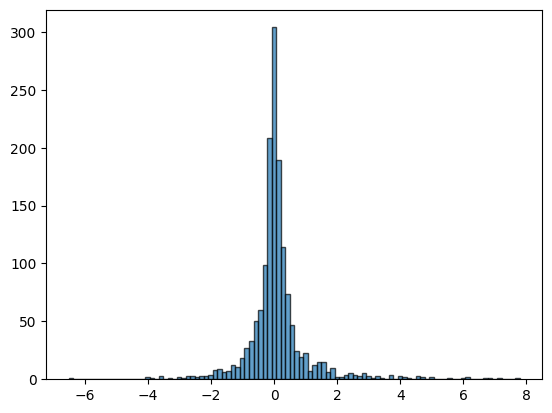

In [751]:
plt.hist(y_train['TARGET'].values, bins=100, edgecolor='k', alpha=0.7)

In [767]:
x_train = x_train.drop('DE_FR_EXCHANGE' , axis=1)
x_train = x_train.drop('FR_NET_EXPORT' , axis=1)
x_train = x_train.drop('DE_NET_EXPORT' , axis=1)

In [83]:
np.mean(x_train['FR_CONSUMPTION'].values)

-0.020031624892714997

In [759]:
x_train

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,FR_DE_EXCHANGE,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,0.606523,NaN,-0.692860,0.441238,-0.213766,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,0.022063,0.573520,1.130838,0.174773,0.426940,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,-1.021305,0.622021,1.682587,2.351913,2.122241,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,0.839586,0.270870,-0.563230,0.487818,0.194659,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,0.924990,NaN,-0.990324,0.238693,-0.240862,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,1.855327,0.218658,-1.450426,1.810665,1.388269,...,0.509514,NaN,NaN,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373
1490,1674,887,FR,1.618582,1.752840,-0.611392,-0.449153,0.152146,1.972779,1.558300,...,1.666252,NaN,NaN,NaN,NaN,NaN,NaN,0.932633,-0.085690,0.356356
1491,748,1083,DE,0.856399,0.489199,0.255778,1.531544,0.829568,2.108764,1.866399,...,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152
1492,1454,1133,FR,0.560689,-0.343777,0.830239,0.304856,-1.210230,-0.003973,0.869742,...,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812


In [85]:
x_train_fr.iloc[: , -3:]

NameError: name 'x_train_fr' is not defined

In [782]:
np.sort(x_train_de["DAY_ID"].values[x_train['COUNTRY'].values=='DE'])

array([   2,    3,    5,    7,    8,   11,   12,   14,   16,   20,   21,
         22,   23,   25,   26,   27,   31,   34,   36,   37,   38,   40,
         41,   42,   46,   49,   53,   55,   57,   60,   61,   62,   66,
         68,   70,   71,   72,   73,   74,   77,   78,   81,   82,   83,
         86,   87,   88,   92,   93,   94,   96,   97,   98,   99,  101,
        102,  104,  105,  106,  107,  108,  109,  112,  116,  117,  118,
        120,  121,  122,  124,  127,  130,  131,  134,  135,  137,  143,
        144,  146,  147,  149,  150,  152,  154,  155,  158,  162,  163,
        165,  166,  168,  169,  170,  172,  175,  178,  179,  180,  181,
        183,  184,  187,  188,  189,  191,  192,  194,  195,  198,  199,
        201,  203,  204,  205,  207,  209,  214,  217,  219,  220,  221,
        222,  223,  225,  229,  230,  231,  232,  236,  237,  239,  240,
        243,  246,  247,  250,  251,  253,  257,  258,  262,  263,  266,
        267,  268,  269,  270,  272,  274,  276,  2

In [783]:
a1= [1,2,3]
b1=[5,6,7]
a2 = [2,1,3]
b2 = [6,5,7]
print(spearmanr(a1,b1).correlation)
print(spearmanr(a2,b2).correlation)

1.0
1.0


In [144]:
print(spearmanr(0.01*x_train['CARBON_RET'].values[x_train['COUNTRY'].values=='DE'] + x_train['DE_RESIDUAL_LOAD'].values[x_train['COUNTRY'].values=='DE'], y_train['TARGET'].values[x_train['COUNTRY'].values=='DE']).correlation)

0.3240557281033911


In [768]:
x_train_de = x_train.copy()
columnsde = x_train_de.columns
for col in columnsde:
    if (not(col=='COUNTRY')):
        x_train_de[col].fillna(x_train_de[col].mean(), inplace=True)

In [769]:
x_train_de

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,FR_DE_EXCHANGE,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,0.606523,0.256332,-0.692860,0.441238,-0.213766,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,0.022063,0.573520,1.130838,0.174773,0.426940,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,-1.021305,0.622021,1.682587,2.351913,2.122241,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,0.839586,0.270870,-0.563230,0.487818,0.194659,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,0.924990,0.256332,-0.990324,0.238693,-0.240862,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,1.855327,0.218658,-1.450426,1.810665,1.388269,...,0.509514,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.876984,0.819520,1.320373
1490,1674,887,FR,1.618582,1.752840,-0.611392,-0.449153,0.152146,1.972779,1.558300,...,1.666252,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.932633,-0.085690,0.356356
1491,748,1083,DE,0.856399,0.489199,0.255778,1.531544,0.829568,2.108764,1.866399,...,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152
1492,1454,1133,FR,0.560689,-0.343777,0.830239,0.304856,-1.210230,-0.003973,0.869742,...,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812


In [779]:
np.random.seed(42)
spearmanr(np.random.permutation(x_train_de['DE_NET_IMPORT'].values[x_train_de['COUNTRY'].values=='DE']), np.random.permutation(y_train['TARGET'].values[x_train_de['COUNTRY'].values=='DE'])).correlation

0.0166080306957852

In [770]:
x_train_de = x_train.copy()
columnsde = x_train_de.columns
for i in range(len(columnsde)):
    corr = spearmanr(x_train_de[columnsde[i]].values[x_train_de['COUNTRY'].values=='DE'], y_train['TARGET'].values[x_train_de['COUNTRY'].values=='DE']).correlation
    print( str(columnsde[i]) + ':' + str(corr))
    if (abs(corr)<0.05) & (i>=3):
        x_train_de = x_train_de.drop(columns = [columnsde[i]])

ID:-0.00929776719886291
DAY_ID:0.008881813743038995
COUNTRY:nan
DE_CONSUMPTION:-0.07173574456340875
FR_CONSUMPTION:-0.03365079256173211
FR_DE_EXCHANGE:0.09440220537032709
DE_NET_IMPORT:0.30620421549756394
FR_NET_IMPORT:0.004076298774337723
DE_GAS:0.2534095234587315
FR_GAS:0.072783594380426
DE_COAL:0.14205372493654747
FR_COAL:0.03262107496293653
DE_HYDRO:0.21790028292061114
FR_HYDRO:0.058362038936583795
DE_NUCLEAR:0.012366411484973836
FR_NUCLEAR:-0.00888456720595872
DE_SOLAR:0.021201529065667447
FR_SOLAR:0.04648287820565579
DE_WINDPOW:-0.30093322983322035
FR_WINDPOW:-0.1998195714429064
DE_LIGNITE:0.12460534779154166
DE_RESIDUAL_LOAD:0.32433450859934143
FR_RESIDUAL_LOAD:0.03995193446794366
DE_RAIN:nan
FR_RAIN:nan
DE_WIND:nan
FR_WIND:nan
DE_TEMP:nan
FR_TEMP:nan
GAS_RET:-0.015835051278364626
COAL_RET:-0.020653454761500864
CARBON_RET:0.01036583997929758


/Users/pouya/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [363]:
columnsfr = x_train_de.columns
for i in columnsfr:
    print( str(i) + ':' + str(spearmanr(x_train_de[i].values[x_train_de['COUNTRY'].values=='DE'], y_train['TARGET'].values[x_train_de['COUNTRY'].values=='DE']).correlation))


ID:-0.00929776719886291
DAY_ID:0.008881813743038995
COUNTRY:nan
DE_CONSUMPTION:-0.07173574456340875
FR_DE_EXCHANGE:0.09440220537032709
DE_NET_IMPORT:0.30620421549756394
FR_NET_IMPORT:0.004076298774337723
FR_COAL:0.03262107496293653
DE_HYDRO:0.21790028292061114
FR_HYDRO:0.058362038936583795
DE_WINDPOW:-0.30093322983322035
FR_WINDPOW:-0.1998195714429064
DE_RESIDUAL_LOAD:0.32433450859934143
DE_RAIN:nan
FR_RAIN:nan
DE_WIND:nan
FR_WIND:nan
DE_TEMP:nan
FR_TEMP:nan
GAS_RET:-0.015835051278364626
COAL_RET:-0.020653454761500864
CARBON_RET:0.01036583997929758


/Users/pouya/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [ ]:
1,1,1,1,-1,-1,1,1,-1

In [150]:
x_train_de = x_train_de[x_train_de['COUNTRY'] == 'DE']
x_train_de.shape

(643, 18)

In [151]:
xde = x_train_de.values[:,3:]
yde = y_train['TARGET'].values[x_train['COUNTRY'].values=='DE']

In [152]:
xde.shape

(643, 15)

In [110]:
plt.plot(y_train['TARGET'].values[x_train['COUNTRY'].values=='DE'], xde[:,0],'o')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1494 but corresponding boolean dimension is 643

In [630]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function to maximize
def spear(xs):
    # Example quadratic function to maximize: -((x-2)^2 + (y-3)^2)
    return -pearsonr(np.matmul(xde,xs), yde).correlation


# Initial guess or starting point
initial_guess = np.zeros((xde.shape[1]))
initial_guess = initial_guess + 1
#initial_guess = np.array([1,1,1,1,-1,-1,1,1,-1])
#bounds = [(-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1)]
xtol = 1e-6  # Tolerance for parameter values
ftol = 1e-6  # Tolerance for the function value

# Use Powell's method for maximization
result = minimize(fun=lambda x: -spear(x), x0=initial_guess, options={'xtol': xtol, 'ftol': ftol}, method='Newton-CG')
#result = minimize(fun=lambda x: -spear(x), x0=initial_guess, method='Powell')

# Extract the maximized values and objective function value
maximized_values = result.x
maximized_objective_value = -result.fun  # Negate the result to get the actual objective value

print("Maximized Values:", maximized_values)
print("Maximized Objective Value:", maximized_objective_value)

/var/folders/cy/s7_pzg4x2xxcg7cty448hrxc0000gn/T/ipykernel_53078/1125713096.py:19: OptimizeWarning: Unknown solver options: ftol
  result = minimize(fun=lambda x: -spear(x), x0=initial_guess, options={'xtol': xtol, 'ftol': ftol}, method='Newton-CG')


ValueError: Jacobian is required for Newton-CG method

In [9]:
coefs = np.linspace(-1,1,num=21)
bestcoefs = np.zeros((len(coefs), len(coefs), len(coefs), len(coefs), len(coefs), len(coefs), len(coefs), len(coefs), len(coefs)))

In [ ]:
for i1 in tqdm(range(len(coefs))):
    for i2 in range(len(coefs)):
        for i3 in range(len(coefs)):
            for i4 in range(len(coefs)):
                for i5 in range(len(coefs)):
                    for i6 in range(len(coefs)):
                        for i7 in range(len(coefs)):
                            for i8 in range(len(coefs)):
                                for i9 in range(len(coefs)):
                                    ri1 = coefs[i1]
                                    ri2 = coefs[i2]
                                    ri3 = coefs[i3]
                                    ri4 = coefs[i4]
                                    ri5 = coefs[i5]
                                    ri6 = coefs[i6]
                                    ri7 = coefs[i7]
                                    ri8 = coefs[i8]
                                    ri9 = coefs[i9]
                                    corr = spearmanr(i1*xde[:,0]+i2*xde[:,1]+i3*xde[:,2]+i4*xde[:,3]+i5*xde[:,4]+i6*xde[:,5]+i7*xde[:,6]+i8*xde[:,7]+i9*xde[:,8], y_train['TARGET'].values[x_train['COUNTRY'].values=='DE']).correlation
                                    bestcoefs[i1,i2,i3,i4,i5,i6,i7,i8,i9]= corr

  0%|                                                    | 0/21 [00:00<?, ?it/s]

In [ ]:
x_train.iloc[:,0]

In [ ]:
np.linspace(-1,1,num=21)

In [ ]:
columnsfr = x_train.columns
for i in columnsfr:
    print( str(i) + ':' + str(spearmanr(x_train[i].values[x_train['COUNTRY'].values=='FR'], y_train['TARGET'].values[x_train['COUNTRY'].values=='FR']).correlation))


In [ ]:
columnsfr = x_train.columns
for i in columnsfr:
    plt.figure()
    plt.title(i)
    plt.plot(x_train[i].values[x_train['COUNTRY'].values=='FR'], y_train['TARGET'].values[x_train['COUNTRY'].values=='FR'], 'o')

In [ ]:
columnsfr = x_train_fr.columns
for i in range(len(columnsfr)):
    corr = spearmanr(x_train[columnsfr[i]].values[x_train['COUNTRY'].values=='FR'], y_train['TARGET'].values[x_train['COUNTRY'].values=='FR']).correlation
    if (abs(corr)<0.04) & (i>=3):
        x_train_fr = x_train_fr.drop(columns = [columnsfr[i]])
        print('del')

In [ ]:
x_train_fr

In [ ]:
print(x_train['FR_RESIDUAL_LOAD'].values/x_train['FR_CONSUMPTION'].values)
print(spearmanr(x_train['GAS_RET'].values[x_train['COUNTRY'].values=='FR']/np.max(np.abs(x_train['GAS_RET'].values[x_train['COUNTRY'].values=='FR'])), y_train['TARGET'].values[x_train['COUNTRY'].values=='FR']).correlation)
print(spearmanr(x_train['COAL_RET'].values[x_train['COUNTRY'].values=='FR'], y_train['TARGET'].values[x_train['COUNTRY'].values=='FR']).correlation)
print(spearmanr(x_train['CARBON_RET'].values[x_train['COUNTRY'].values=='FR'], y_train['TARGET'].values[x_train['COUNTRY'].values=='FR']).correlation)
print(spearmanr(x_train['GAS_RET'].values[x_train['COUNTRY'].values=='FR'], y_train['TARGET'].values[x_train['COUNTRY'].values=='FR']).correlation)
print(spearmanr(x_train['FR_NET_IMPORT'].values[x_train['COUNTRY'].values=='FR'], y_train['TARGET'].values[x_train['COUNTRY'].values=='FR']).correlation)



In [ ]:
newxdata = 

In [ ]:
x_train

In [ ]:
x_train.columns

In [377]:
x_train_fr = x_train[x_train['COUNTRY'] == 'FR']
x_train_fr = x_train_fr.drop(columns = [col for col in x_train_fr.columns if 'DE' in col])
x_train_fr

,ID,DAY_ID,COUNTRY,FR_CONSUMPTION,FR_NET_IMPORT,FR_GAS,FR_COAL,FR_HYDRO,FR_NUCLEAR,FR_SOLAR,FR_WINDPOW,FR_RESIDUAL_LOAD,FR_RAIN,FR_WIND,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,-0.427458,-0.692860,-0.213766,0.288782,0.207838,-0.190463,1.248911,-0.269460,-0.444661,-0.556356,-0.283160,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-1.003452,1.130838,0.426940,-0.762153,-0.807112,-2.185961,3.237380,-0.107350,-1.183194,-0.770457,0.828412,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.978665,1.682587,2.122241,0.777053,0.779142,0.735137,-0.371039,-0.141239,1.947273,-0.313338,0.487608,0.114836,0.535974,0.743338,0.204952
4,1101,818,FR,-0.617038,-0.990324,-0.240862,-0.274975,-0.795983,0.176935,0.723587,-0.564498,-0.526267,-0.424550,-1.011560,0.729495,0.245109,1.526606,2.614378
5,1520,467,FR,-0.765120,0.200305,0.306422,-0.775944,0.593251,-1.920695,2.054491,-0.245628,-0.860628,-0.193837,-0.917234,0.472708,0.891049,0.861408,1.124457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,1776,510,FR,-0.704613,-1.112333,-0.456156,-0.793961,0.538795,-0.539194,1.013134,0.149270,-0.795046,1.021354,0.805043,-0.555211,1.946355,0.867074,1.322433
1486,1401,985,FR,0.944372,-0.499653,1.320758,-0.779539,0.375729,0.791698,-1.054641,1.646472,0.634867,-0.441164,-0.658130,0.829517,0.494188,1.011794,1.472650
1487,1728,905,FR,0.459382,1.048997,0.715357,-0.305680,-0.188248,-0.457660,1.953376,0.536297,0.251190,-0.152293,1.697829,-2.069991,1.145686,0.335645,0.606318
1490,1674,887,FR,1.752840,0.152146,1.558300,0.230746,2.957114,0.926279,-0.923261,0.789618,1.666252,NaN,NaN,NaN,0.932633,-0.085690,0.356356


In [441]:
xdatafr = x_train_fr.iloc[: , 3:].values
ydatafr = y_train['TARGET'].values[x_train['COUNTRY'].values=='FR']

In [478]:
x_train_fr = x_train[x_train['COUNTRY'] == 'FR']
#x_train_fr = x_train_fr.drop(columns = [col for col in x_train_fr.columns if 'DE' in col])
xdatafr = x_train_fr.iloc[: , -3:].values
ydatafr = y_train['TARGET'].values[x_train['COUNTRY'].values=='FR']

x_train_de = x_train.copy()
columnsde = x_train_de.columns
for col in columnsde:
    if (not(col=='COUNTRY')):
        x_train_de[col].fillna(x_train_de[col].mean(), inplace=True)
x_train_de = x_train_de[x_train_de['COUNTRY'] == 'DE']
xdatade = x_train_de.iloc[: , 3:].values
ydatade = y_train['TARGET'].values[x_train['COUNTRY'].values=='DE']

In [443]:
x_train_de = x_train_de[x_train_de['COUNTRY'] == 'DE']
xdatade = x_train_de.iloc[: , 3:].values
ydatade = y_train['TARGET'].values[x_train['COUNTRY'].values=='DE']

In [444]:
xdatade.shape

(643, 19)

In [631]:
xcompde = np.zeros((xdatade.shape[0],xdatade.shape[1]+1,xdatade.shape[1]))
xcompde[:,xdatade.shape[1],:]=xdatade.copy()
for i in range (xdatade.shape[1]):
    for j in range (xdatade.shape[1]):
        xcompde [:,i,j] = xdatade[:,i]*xdatade[:,j]
xcompde = np.reshape(xcompde,(xdatade.shape[0],(xdatade.shape[1]+1)*xdatade.shape[1]))

In [691]:
xcompde = xdatade.copy()
dels = []
for i in range(xcompde.shape[1]):
    corr = spearmanr(xcompde[:,i], ydatade).correlation
    if (abs(corr)<0.01):
        dels.append(i)

In [692]:
xcompdefinal = np.delete(xcompde,dels,axis=1)

In [651]:
xcompdefinal.shape

(643, 26)

In [615]:
xcompfr = xdatafr.copy()
dels = []
for i in range(xcompfr.shape[1]):
    corr = spearmanr(xcompfr[:,i], ydatafr).correlation
    if (abs(corr)<0.1):
        dels.append(i)

In [616]:
xcompfrfinal = np.delete(xcompfr,dels,axis=1)

In [417]:
xcompde = np.zeros((xdatade.shape[0],2*xdatade.shape[1]))
xcompde[:,xdatade.shape[1]:]=xdatade.copy()
xcompde[:,:xdatade.shape[1]]=1/(xdatade.copy()+0.001)

In [218]:
xcompdefinal = xcompde.copy()

array([[ -1.01799418,  -1.17896995,   1.18964637, ...,   0.9116521 ,
         -0.29616844,   1.07394768],
       [-18.28436053,  -1.23405415,  -4.23540126, ...,  -0.35986623,
         -0.20395231,  -0.37623403],
       [  1.87576567,  -3.02937152,  -2.95035603, ...,   1.17076001,
          0.13364288,   0.03387434],
       ...,
       [  0.65350763,   0.90278598,   0.53869822, ...,   0.8769841 ,
          0.81951951,   1.32037276],
       [  1.1663175 ,   2.03998898,   3.89441784, ...,  -1.11289854,
         -0.23783497,   0.06715239],
       [  4.39116305,  -1.40844019,  -1.1467673 , ...,   1.05982889,
         -0.32663975,  -0.56672406]])

In [255]:
from scipy.optimize import minimize

# Define the objective function to maximize
def spear(xs):
    # Example quadratic function to maximize: -((x-2)^2 + (y-3)^2)
    return -spearmanr(np.matmul(xcompdefinal,xs), ydatade).correlation


# Initial guess or starting point
initial_guess = np.zeros((xcompdefinal.shape[1]))
initial_guess = initial_guess + 1
xtol = 1e-5  # Tolerance for parameter values
ftol = 1e-5  # Tolerance for the function value

# Use Powell's method for maximization
result = minimize(fun=lambda x: -spear(x), x0=initial_guess, options={'xtol': xtol, 'ftol': ftol}, method='Powell')
#result = minimize(fun=lambda x: -spear(x), x0=initial_guess, method='Powell')

# Extract the maximized values and objective function value
maximized_values = result.x
maximized_objective_value = -result.fun  # Negate the result to get the actual objective value

print("Maximized Values:", maximized_values)
print("Maximized Objective Value:", maximized_objective_value)

Maximized Values: [ 5.95925454e+03  5.88906424e+00 -8.83738582e+06 -1.32481757e+01
  3.08949788e+01  3.08949788e+01 -1.32481757e+01 -1.32481757e+01
  3.08949788e+01  3.08949788e+01  3.08949788e+01  3.08949788e+01
  3.08949788e+01  3.08949788e+01  3.08949788e+01]
Maximized Objective Value: 0.30619888912667


In [457]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [698]:
X_train, X_test, Y_train, Y_test = train_test_split(xcompdefinal, ydatade, test_size=0.5, random_state=27)

In [699]:
# Z-score (standardize) each column
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [456]:
np.sum(X_train==np.nan)

0

In [368]:
# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42 , max_depth = 100)

# Train the model
rf_regressor.fit(X_train, Y_train)

Y_pred = rf_regressor.predict(X_test)

print(spearmanr(Y_pred, Y_test).correlation)

0.1829378642964703


In [700]:
# Create an SVR model
svr = SVR(kernel='rbf', C=0.01, epsilon=0.001)

# Train the model on the training data
svr.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = svr.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

print(spearmanr(Y_pred, Y_test).correlation)

Mean Squared Error: 1.1410113666824622
0.35850214248962275


In [499]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'epsilon': [0.01, 0.1, 1],
    'coef0': [0, 1, 2]
}

# Create the SVR model
svr = SVR(kernel='poly')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)
# Train the SVR model with the best hyperparameters
best_svr = SVR(kernel='poly', **best_params)
best_svr.fit(X_train, y_train)

KeyboardInterrupt: 

In [229]:
ridge_model = Ridge(alpha=1.0)
print('done')
ridge_model.fit(X_train, Y_train)
Y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

NameError: name 'Ridge' is not defined

In [606]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
from sklearn.metrics import mean_squared_log_error

# Assuming y_true and y_pred are your true and predicted values
msle = mean_squared_log_error(np.abs(Y_test), np.abs(Y_pred))
print(mse)
print(spearmanr(Y_pred, Y_test).correlation)

0.7847480487011661
0.17240238691976745


In [586]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
from sklearn.metrics import mean_squared_log_error

# Assuming y_true and y_pred are your true and predicted values
msle = mean_squared_log_error(np.abs(Y_test), np.abs(Y_pred))
print(mse)
print(spearmanr(Y_pred, Y_test).correlation)

1.2662402470425815
0.33327762121476495


In [240]:
from sklearn import linear_model
model = linear_model.PoissonRegressor()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
from sklearn.metrics import mean_squared_log_error

# Assuming y_true and y_pred are your true and predicted values
msle = mean_squared_log_error(np.abs(Y_test), np.abs(Y_pred))
print(mse)
print(spearmanr(Y_pred, Y_test).correlation)

ValueError: Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.

In [ ]:
print(Y_pred[:10])
print(Y_test[:10])

In [243]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [241]:
X_train, X_temp, y_train, y_temp = train_test_split(xdatade, ydatade, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [244]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer (single neuron for regression)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val))

loss, mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')


Epoch 1/1000
17/17 [==============================] - 0s 6ms/step - loss: 1.2213 - mse: 1.2213 - val_loss: 0.8478 - val_mse: 0.8478
Epoch 2/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.0342 - mse: 1.0342 - val_loss: 0.8316 - val_mse: 0.8316
Epoch 3/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.9773 - mse: 0.9773 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 4/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.9278 - mse: 0.9278 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 5/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.9131 - mse: 0.9131 - val_loss: 0.8321 - val_mse: 0.8321
Epoch 6/1000
17/17 [==============================] - 0s 2ms/step - loss: 0.8597 - mse: 0.8597 - val_loss: 0.8571 - val_mse: 0.8571
Epoch 7/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.8301 - mse: 0.8301 - val_loss: 0.8323 - val_mse: 0.8323
Epoch 8/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.

17/17 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 2.4277 - val_mse: 2.4277
Epoch 124/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 2.4032 - val_mse: 2.4032
Epoch 125/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 2.4647 - val_mse: 2.4647
Epoch 126/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 2.4087 - val_mse: 2.4087
Epoch 127/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 2.4061 - val_mse: 2.4061
Epoch 128/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 2.4490 - val_mse: 2.4490
Epoch 129/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 2.3414 - val_mse: 2.3414
Epoch 130/1000
17/17 [==============================] - 0s 1ms/step - loss: 0

Epoch 245/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0668 - mse: 0.0668 - val_loss: 2.4687 - val_mse: 2.4687
Epoch 246/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 2.2100 - val_mse: 2.2100
Epoch 247/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 2.5943 - val_mse: 2.5943
Epoch 248/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 2.0977 - val_mse: 2.0977
Epoch 249/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 2.5399 - val_mse: 2.5399
Epoch 250/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 1.8228 - val_mse: 1.8228
Epoch 251/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 2.3756 - val_mse: 2.3756
Epoch 252/1000
17/17 [==============================] - 0s 1ms

17/17 [==============================] - 0s 1ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 1.8600 - val_mse: 1.8600
Epoch 366/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 1.8598 - val_mse: 1.8598
Epoch 367/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 1.9727 - val_mse: 1.9727
Epoch 368/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 2.1417 - val_mse: 2.1417
Epoch 369/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 2.0395 - val_mse: 2.0395
Epoch 370/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 1.8509 - val_mse: 1.8509
Epoch 371/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 1.9264 - val_mse: 1.9264
Epoch 372/1000
17/17 [==============================] - 0s 1ms/step - loss: 0

17/17 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 1.7837 - val_mse: 1.7837
Epoch 426/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 1.8940 - val_mse: 1.8940
Epoch 427/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 1.8364 - val_mse: 1.8364
Epoch 428/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 1.7343 - val_mse: 1.7343
Epoch 429/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 1.9284 - val_mse: 1.9284
Epoch 430/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 1.8870 - val_mse: 1.8870
Epoch 431/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 1.7847 - val_mse: 1.7847
Epoch 432/1000
17/17 [==============================] - 0s 1ms/step - loss: 0

17/17 [==============================] - 0s 1ms/step - loss: 3.5964e-04 - mse: 3.5964e-04 - val_loss: 1.7479 - val_mse: 1.7479
Epoch 545/1000
17/17 [==============================] - 0s 1ms/step - loss: 3.3158e-04 - mse: 3.3158e-04 - val_loss: 1.7031 - val_mse: 1.7031
Epoch 546/1000
17/17 [==============================] - 0s 1ms/step - loss: 3.0606e-04 - mse: 3.0606e-04 - val_loss: 1.7213 - val_mse: 1.7213
Epoch 547/1000
17/17 [==============================] - 0s 1ms/step - loss: 9.5541e-04 - mse: 9.5541e-04 - val_loss: 1.6959 - val_mse: 1.6959
Epoch 548/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 1.7711 - val_mse: 1.7711
Epoch 549/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 1.6539 - val_mse: 1.6539
Epoch 550/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 1.7541 - val_mse: 1.7541
Epoch 551/1000
17/17 [=======================

Epoch 605/1000
17/17 [==============================] - 0s 1ms/step - loss: 5.8826e-04 - mse: 5.8826e-04 - val_loss: 1.6702 - val_mse: 1.6702
Epoch 606/1000
17/17 [==============================] - 0s 1ms/step - loss: 4.2268e-04 - mse: 4.2268e-04 - val_loss: 1.6981 - val_mse: 1.6981
Epoch 607/1000
17/17 [==============================] - 0s 1ms/step - loss: 4.1536e-04 - mse: 4.1536e-04 - val_loss: 1.6712 - val_mse: 1.6712
Epoch 608/1000
17/17 [==============================] - 0s 1ms/step - loss: 3.4432e-04 - mse: 3.4432e-04 - val_loss: 1.6739 - val_mse: 1.6739
Epoch 609/1000
17/17 [==============================] - 0s 1ms/step - loss: 2.9235e-04 - mse: 2.9235e-04 - val_loss: 1.6831 - val_mse: 1.6831
Epoch 610/1000
17/17 [==============================] - 0s 1ms/step - loss: 2.6884e-04 - mse: 2.6884e-04 - val_loss: 1.6747 - val_mse: 1.6747
Epoch 611/1000
17/17 [==============================] - 0s 1ms/step - loss: 2.9338e-04 - mse: 2.9338e-04 - val_loss: 1.6906 - val_mse: 1.6906
Epoch 

17/17 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 1.5865 - val_mse: 1.5865
Epoch 665/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 1.5557 - val_mse: 1.5557
Epoch 666/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 1.5984 - val_mse: 1.5984
Epoch 667/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 1.5730 - val_mse: 1.5730
Epoch 668/1000
17/17 [==============================] - 0s 1ms/step - loss: 9.1817e-04 - mse: 9.1817e-04 - val_loss: 1.6044 - val_mse: 1.6044
Epoch 669/1000
17/17 [==============================] - 0s 1ms/step - loss: 6.9962e-04 - mse: 6.9962e-04 - val_loss: 1.5844 - val_mse: 1.5844
Epoch 670/1000
17/17 [==============================] - 0s 1ms/step - loss: 6.8698e-04 - mse: 6.8698e-04 - val_loss: 1.5880 - val_mse: 1.5880
Epoch 671/1000
17/17 [==============================]

Epoch 783/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 1.4942 - val_mse: 1.4942
Epoch 784/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 1.4772 - val_mse: 1.4772
Epoch 785/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 1.4971 - val_mse: 1.4971
Epoch 786/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 1.4878 - val_mse: 1.4878
Epoch 787/1000
17/17 [==============================] - 0s 1ms/step - loss: 8.8602e-04 - mse: 8.8602e-04 - val_loss: 1.5064 - val_mse: 1.5064
Epoch 788/1000
17/17 [==============================] - 0s 1ms/step - loss: 6.6487e-04 - mse: 6.6487e-04 - val_loss: 1.5039 - val_mse: 1.5039
Epoch 789/1000
17/17 [==============================] - 0s 1ms/step - loss: 5.5889e-04 - mse: 5.5889e-04 - val_loss: 1.4987 - val_mse: 1.4987
Epoch 790/1000
17/17 [================

17/17 [==============================] - 0s 1ms/step - loss: 9.2403e-05 - mse: 9.2403e-05 - val_loss: 1.4983 - val_mse: 1.4983
Epoch 903/1000
17/17 [==============================] - 0s 1ms/step - loss: 9.4541e-05 - mse: 9.4541e-05 - val_loss: 1.4970 - val_mse: 1.4970
Epoch 904/1000
17/17 [==============================] - 0s 1ms/step - loss: 6.7861e-05 - mse: 6.7861e-05 - val_loss: 1.4910 - val_mse: 1.4910
Epoch 905/1000
17/17 [==============================] - 0s 1ms/step - loss: 5.9385e-05 - mse: 5.9385e-05 - val_loss: 1.4975 - val_mse: 1.4975
Epoch 906/1000
17/17 [==============================] - 0s 1ms/step - loss: 3.6732e-05 - mse: 3.6732e-05 - val_loss: 1.4951 - val_mse: 1.4951
Epoch 907/1000
17/17 [==============================] - 0s 1ms/step - loss: 2.8248e-05 - mse: 2.8248e-05 - val_loss: 1.4945 - val_mse: 1.4945
Epoch 908/1000
17/17 [==============================] - 0s 1ms/step - loss: 2.5404e-05 - mse: 2.5404e-05 - val_loss: 1.4956 - val_mse: 1.4956
Epoch 909/1000
17/17 

In [245]:
y_pred = model.predict(X_test)
print(spearmanr(y_pred, y_test).correlation)

3/3 [==============================] - 0s 846us/step
0.0388986013986014


In [246]:
y_pred

array([[ 8.61859024e-01],
       [ 9.48884368e-01],
       [-7.30958208e-02],
       [ 9.39109981e-01],
       [ 2.10482687e-01],
       [ 6.32791221e-01],
       [-1.92379475e-01],
       [-4.63664010e-02],
       [-1.17511988e+00],
       [ 8.10114145e-01],
       [ 9.28943977e-04],
       [ 3.56522471e-01],
       [ 3.96573812e-01],
       [ 4.49059680e-02],
       [ 5.72784126e-01],
       [ 2.22005606e+00],
       [ 3.49736243e-01],
       [ 1.43725276e+00],
       [-5.59917867e-01],
       [ 4.31296259e-01],
       [ 1.26706481e-01],
       [-4.18957204e-01],
       [ 4.30538893e-01],
       [ 1.04075718e+00],
       [ 8.38241041e-01],
       [ 3.63927424e-01],
       [-3.62140357e-01],
       [-2.83931736e-02],
       [-2.51420408e-01],
       [-2.77214855e-01],
       [-4.59460676e-01],
       [-2.33200371e-01],
       [ 2.31005326e-01],
       [ 1.41154438e-01],
       [-4.41422999e-01],
       [ 9.88145232e-01],
       [ 5.76259196e-01],
       [-2.89449185e-01],
       [ 2.2

In [247]:
y_test

array([-1.44319694e-01,  1.32341000e+00,  2.01798494e-01,  5.12722564e-01,
        5.46301421e-01, -2.04866312e-01,  3.30494920e+00,  1.71354028e-01,
       -5.13327563e-03,  1.71254820e+00, -3.16178244e-01, -1.24481800e-01,
        5.43005269e-01,  6.15113337e+00,  8.25401690e-02,  3.65625081e-01,
        2.51031047e-01,  8.11774695e-02,  1.25656724e+00,  3.57000985e-01,
       -8.23516026e-02,  1.37418714e+00, -1.19966610e-01,  3.29283970e-02,
       -4.04038765e-01,  1.96311529e-01,  1.05095363e-01,  1.27149134e-02,
        1.18126587e-01,  6.96176186e-01,  4.20970921e-01, -1.09654698e-01,
        2.71843447e-01,  9.32710224e-01, -4.44789193e-01, -2.44404718e-02,
        5.98348862e-01, -7.76042300e-01, -3.38773890e-01,  4.78901050e-02,
       -2.07412530e-02,  3.31388464e-02, -1.25738963e-01, -9.54835852e-02,
        1.71587946e-01, -1.28966178e+00, -3.22010423e-01, -4.77501202e-01,
        5.46469696e-01, -2.49762829e-01,  4.93477944e-02, -4.78190931e-02,
       -2.19393096e-01,  

In [ ]:
20**12